<a id="1.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:200%;text-align:center">Drug Recommendation System in Health Care Using Machine Learning</h3>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medicine-recommendation/Company_Name.xlsx
/kaggle/input/medicine-recommendation/Ratings.xlsx
/kaggle/input/medicine-recommendation/Medicine_description.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/medicine-recommendation/Medicine_description.xlsx')
df.head()

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


Dataset has 22479 unique groups
********************
And the top 10 counts are :
M Cold Plus CZ Tablet 10'S                                                                                    2
Gefer Capsule 10'S                                                                                            2
Olmefit AM 20mg Tablet 10'S                                                                                   1
Methertin Tablet 10'S                                                                                         1
Vogo 0.3mg Tablet 10'SVogo 0.3mg Tablet 15'SVogo 0.2mg Tablet 15'SVogo 0.2mg Tablet 10'S                      1
Benformin L S 1.25mg Tablet 10'S                                                                              1
Sicriptin 10mg Tablet 10'SSicriptin 1.25mg Tablet 10'SSicriptin 5mg Tablet 10'SSicriptin 2.5mg Tablet 10'S    1
Adride 1mg Tablet 10'SAdride 4mg Tablet 10'SAdride 2mg Tablet 10'S                                            1
Hairootz Soflet 15'S   

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

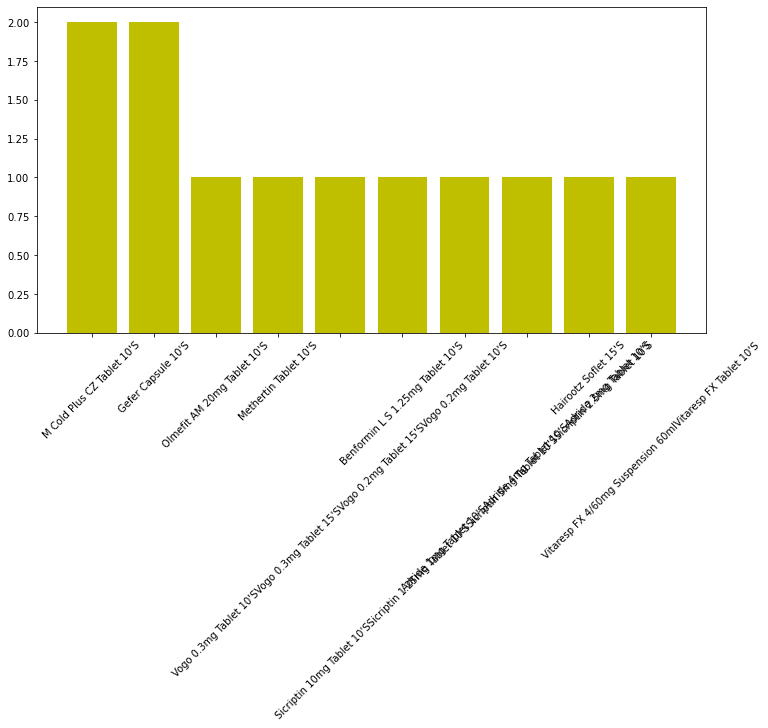

In [3]:
#Code by Savita Nair https://www.kaggle.com/savitanair/hr-analytics

print(f'Dataset has {len(df.Drug_Name.unique())} unique groups')
print('*'*20)
print(f'And the top 10 counts are :')
print(df.Drug_Name.value_counts().head(10))
print('*'*20)

c = df.Drug_Name.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(c.index, c.values, width=0.8, color='y')
plt.xticks(rotation=45)

Dataset has 51 unique groups
********************
And the top 10 counts are :
Supplement      3913
Pain            2852
Infection       2629
Hypertension    2505
Diabetes        2013
Fungal           878
Allergies        865
Depression       628
Anxiety          502
Anaemia          490
Name: Reason, dtype: int64
********************


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

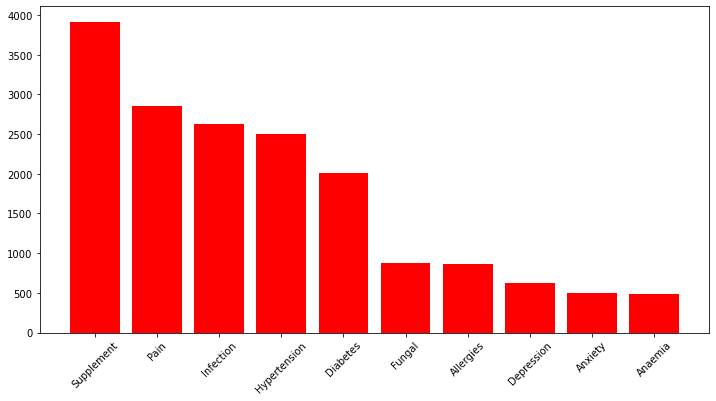

In [4]:
#Code by Savita Nair https://www.kaggle.com/savitanair/hr-analytics

print(f'Dataset has {len(df.Reason.unique())} unique groups')
print('*'*20)
print(f'And the top 10 counts are :')
print(df.Reason.value_counts().head(10))
print('*'*20)

c = df.Reason.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(c.index, c.values, width=0.8, color='r')
plt.xticks(rotation=45)

Dataset has 301 unique names
********************
And the top 10 counts are :
reduces the diabetes                                                                                                                            671
reduces sugar level diabetes                                                                                                                    671
treat type 2 diabetes mellitus when diet, physical exercise and weight reduction alone have not been able to control your blood sugar levels    671
lower chance of stroke in patients with high blood pressure and a heart problem called left ventricular hypertrophy (LVH)                       578
lower high blood pressure (hypertension)                                                                                                        578
improves immunity                                                                                                                               493
urinary tract and kidneys         

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

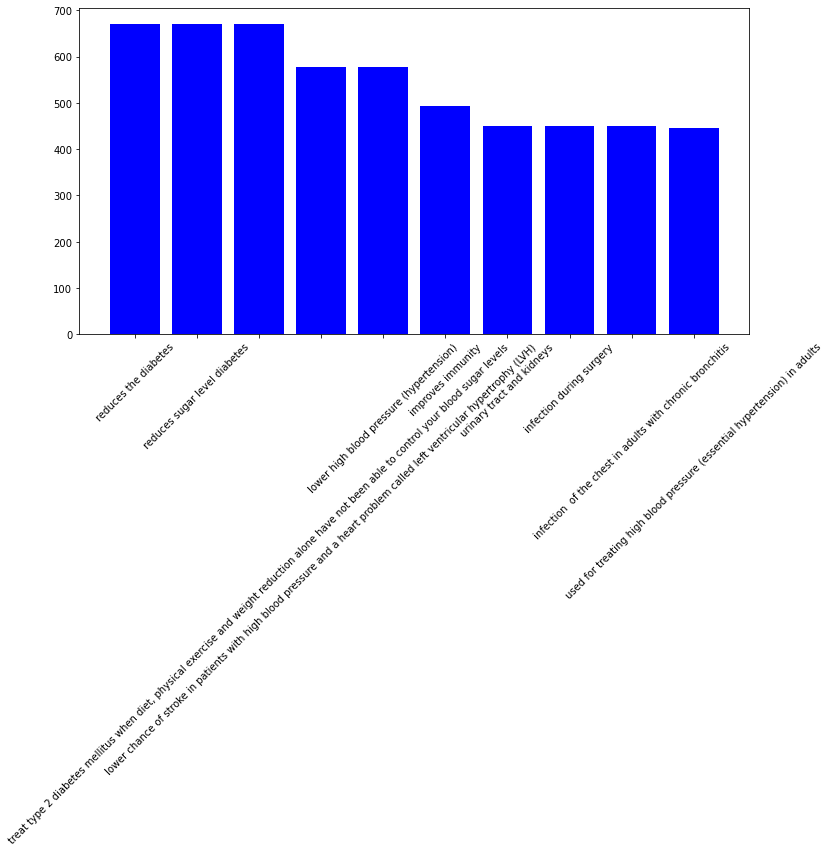

In [5]:
#Code by Savita Nair https://www.kaggle.com/savitanair/hr-analytics

print(f'Dataset has {len(df.Description.unique())} unique names')
print('*'*20)
print(f'And the top 10 counts are :')
print(df.Description.value_counts().head(10))
print('*'*20)

c = df.Description.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(c.index, c.values, width=0.8, color='b')
plt.xticks(rotation=45)

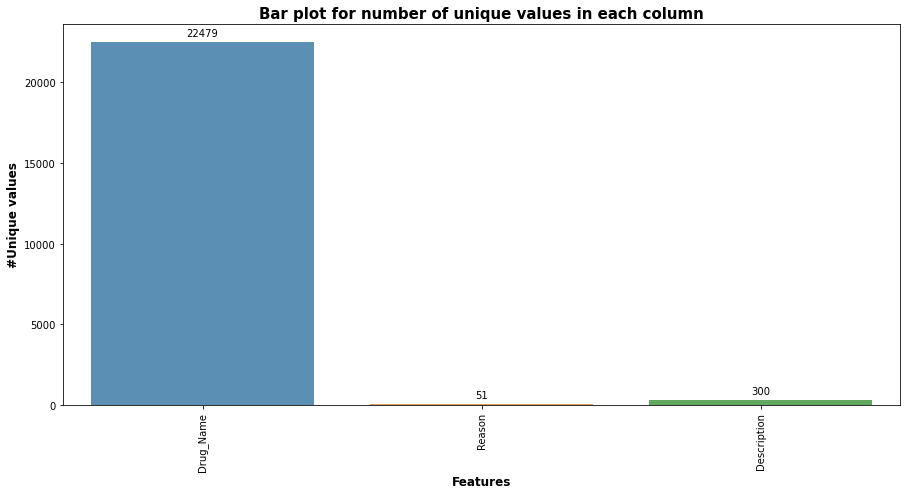

In [6]:
#Code by Mohammad Imran Shaikh https://www.kaggle.com/shikhnu/covid19-tweets-eda-visualization-wordcloud

unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

<Figure size 720x432 with 0 Axes>

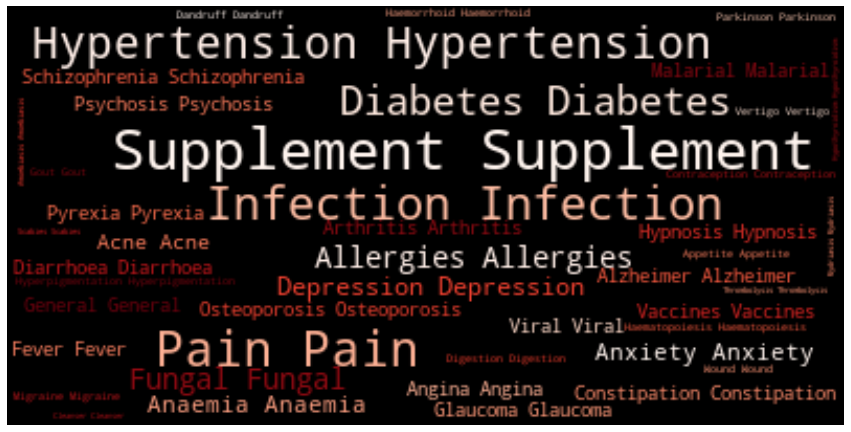

In [7]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.Reason)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Reds', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

In [8]:
df1 = pd.read_excel('/kaggle/input/medicine-recommendation/Ratings.xlsx')
df1.head()

,Short-form,Rating
0,S,4.8
1,R,4.7
2,D,4.5
3,C,4.3
4,B,4.1


In [9]:
df1 = df1.rename(columns={'Short-form':'form'})

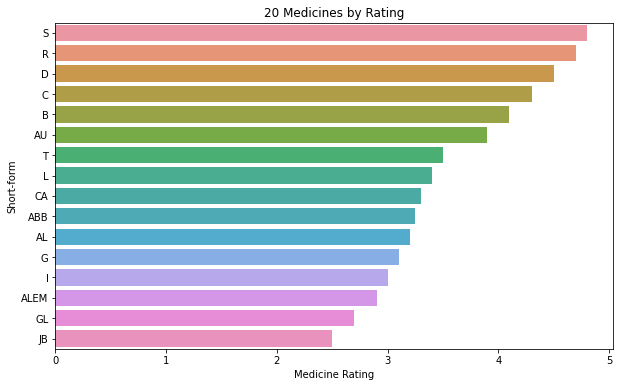

In [10]:
#Code by Siti K https://www.kaggle.com/khotijahs1/2020-indonesia-university-rank/comments

#20 Medicine by Rating
top_medicine = df1.sort_values(by='Rating', ascending=False)[:20]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_medicine.form, x=top_medicine.Rating)
plt.xticks()
plt.xlabel('Medicine Rating')
plt.ylabel('Short-form')
plt.title('20 Medicines by Rating')
plt.show()

In [11]:
df2 = pd.read_excel('/kaggle/input/medicine-recommendation/Company_Name.xlsx')
df2.head()

,S.No,Company_Name,NSE_Symbol,Rating,Industry
0,1,Sun Pharmaceutical Industries Ltd.,SUNPHARMA,S,Pharmaceuticals & Drugs
1,2,Dr. Reddys Laboratories Ltd.,DRREDDY,R,Pharmaceuticals & Drugs
2,3,Divis Laboratories Ltd.,DIVISLAB,D,Pharmaceuticals & Drugs
3,4,Cipla Ltd.,CIPLA,C,Pharmaceuticals & Drugs
4,5,Biocon Ltd.,BIOCON,B,Pharmaceuticals & Drugs


In [12]:
df2.columns.tolist()

['S.No', 'Company_Name', 'NSE_Symbol', 'Rating', 'Industry']

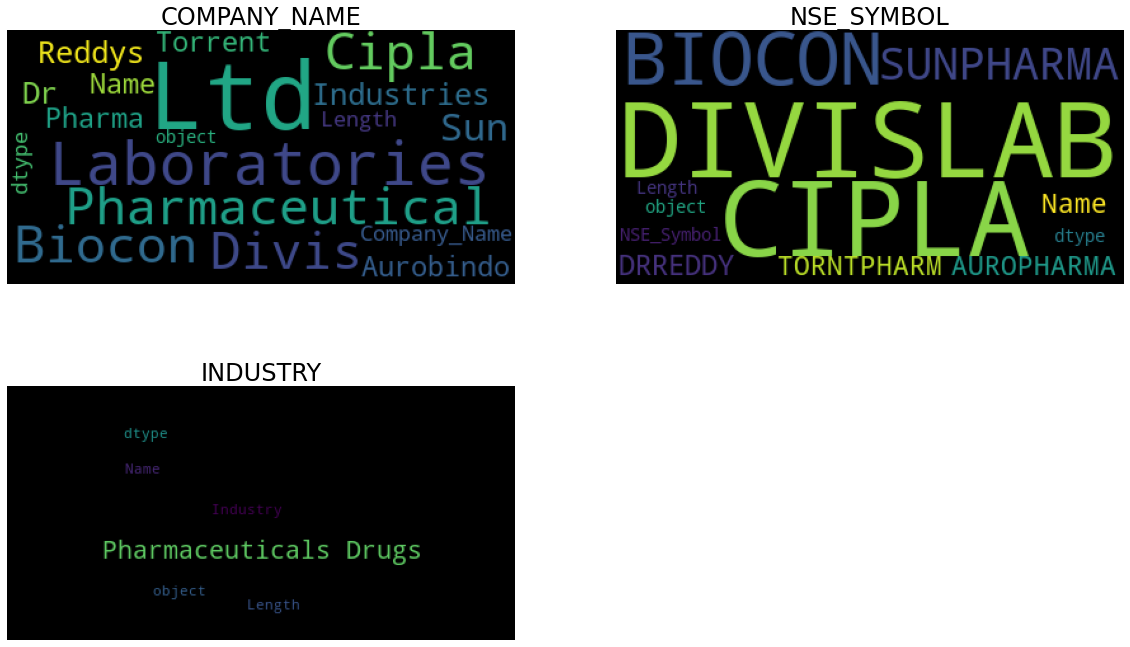

In [13]:
#Codes by Pooja Jain https://www.kaggle.com/jainpooja/av-guided-hackathon-predict-youtube-likes/notebook

text_cols = ['Company_Name','NSE_Symbol', 'Industry']

from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state = 42)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(text_cols):
  op = wc.generate(str(df2[c]))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(c.upper(), fontsize=24)
  _ = axes[i].axis('off')

_ = fig.delaxes(axes[3])

In [14]:
s = (df2.isna().sum()/df2.shape[0]*100)<50
df2_modified = df2[s.index[s].tolist()]
print (df2_modified.shape)
df2_modified.head()

(22481, 5)


,S.No,Company_Name,NSE_Symbol,Rating,Industry
0,1,Sun Pharmaceutical Industries Ltd.,SUNPHARMA,S,Pharmaceuticals & Drugs
1,2,Dr. Reddys Laboratories Ltd.,DRREDDY,R,Pharmaceuticals & Drugs
2,3,Divis Laboratories Ltd.,DIVISLAB,D,Pharmaceuticals & Drugs
3,4,Cipla Ltd.,CIPLA,C,Pharmaceuticals & Drugs
4,5,Biocon Ltd.,BIOCON,B,Pharmaceuticals & Drugs


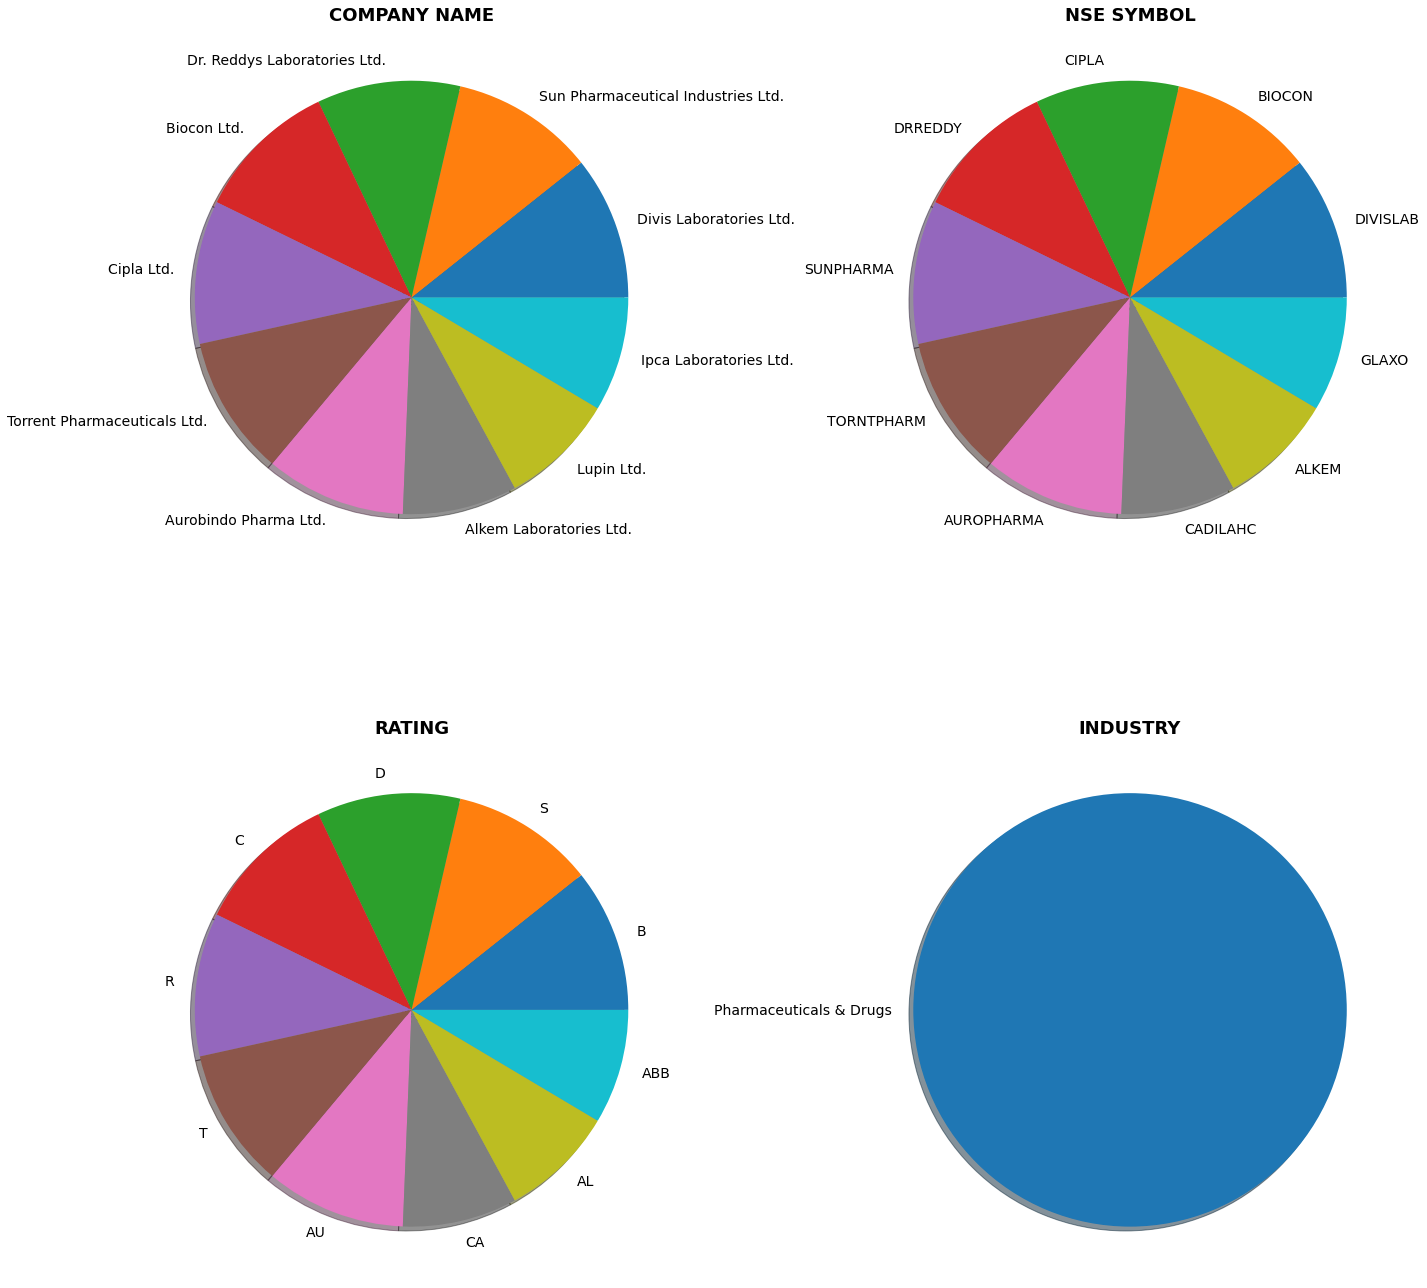

In [15]:
plt.rcParams['font.size'] = 14
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for col, ax in zip(['Company_Name','NSE_Symbol','Rating', 'Industry'], ax.flat):
    dict_ = df2_modified[col].value_counts().head(10).to_dict()
    if ('Not Available' in dict_.keys()):
        dict_.pop('Not Available')
    labels = []
    for i in dict_.keys():
        i = i.split(' ')
        if (len(i) > 6):
            i[math.ceil(len(i)/2)-1] += '\n'
            labels.append(' '.join(i))
        else:
            labels.append(' '.join(i))
    ax.pie(x=list(dict_.values()), labels=labels, shadow=True, startangle=0)
    
    col = (' '.join(col.split('_'))).upper()
    ax.set_title(col, weight='bold', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
#Code by Olga Belitskaya https://www.kaggle.com/olgabelitskaya/sequential-data/comments
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#eb3434','#eb3446','Akronim','Smokum',30,15
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h1>"""%string))
    